# A01275868_Pablo Franklin_Evaluación final argumentativa: Evaluación del desarrollo de mis competencias.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import statsmodels.api as sm
import numpy as np
import io
import scipy.stats as stats
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


data=pd.read_csv('Portuguese 1.csv')

# Introducción.


Este conjunto de datos se centra en el análisis del rendimiento estudiantil en la educación secundaria, específicamente en el contexto de dos escuelas portuguesas. El conjunto de datos abarca una amplia gama de características, incluyendo las calificaciones de los estudiantes, información demográfica, factores sociales y detalles relacionados con la escuela. Estos datos fueron recopilados a través de informes escolares y cuestionarios, con el objetivo de arrojar luz sobre diversos aspectos de la vida estudiantil.

Sin embargo, el enfoque principal de este estudio se centra en una pregunta fundamental: ¿Cómo afecta el consumo de alcohol en las calificaciones de los estudiantes? A través del análisis de este conjunto de datos, exploraremos si existe una relación significativa entre el consumo de alcohol por parte de los estudiantes y su desempeño académico en la educación secundaria. Este análisis tiene como objetivo proporcionar valiosa información para comprender la dinámica entre el estilo de vida de los estudiantes y su éxito académico en estas dos escuelas portuguesas.


# Planteamiento antes de escoger las variables críticas


Lo primero que se realizó fue ver como estaban divido mis datos para posteriormente visualizar cuales de ellos son numéricos y cuales son categóricos

In [10]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [186]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Posteriormente a visualizar cuales son categóricos y cuales son numéricos, quería visualizar si teníamos datos nulos para poder limpiar nuestra base de datos.

In [187]:
data.isnull().sum()
#Pudimos observar que no hubo ningun valor núlo

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Variables críticas

-Estadística descriptiva de las variables más importantes.
-Elección y justificación de las gráficas utilizadas (al menos 5 visualizaciones, no se pueden repetir más de dos gráficas) acorde al tipo de dato de la variable.


Lo primero que realicé fue un pensamiento acerca de la situación problema, lo que tuve en mente fue que el resultado primordial era saber si el consumir alcohol tenía alguna relación en las calificaciones de los estudiantes, por lo que mis variables críticas hasta el momento iba  a ser 'Dalc' el cual es frecuencia de consumo díario de alcohol (consumo de alcohol en días laborales), 'Walc' el cual es frecuencia de consumo de alcohol cada fin de semana y por último mi variable predictora primordial, las calificaciones, 'G3', en este caso opté por las calificaciones finales ya que es el promedio de las calificaciones del primer periodo y segundo periodo mas el tercero.

In [68]:
data['G3'].describe()
#Utilizamos la función describe para visualizar el promedio de nuestros valores, desviación estándar y tambien nuestros 
#Rangos mínimnos y máximos.

count    324.000000
mean      12.145062
std        2.505834
min        0.000000
25%       11.000000
50%       12.000000
75%       14.000000
max       18.000000
Name: G3, dtype: float64

In [69]:
data['Dalc'].describe()
#Utilizamos la función describe para visualizar el promedio de nuestros valores, desviación estándar y tambien nuestros 
#Rangos mínimnos y máximos.

count    324.000000
mean       1.462963
std        0.905018
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Dalc, dtype: float64

In [70]:
data['Walc'].describe()
#Utilizamos la función describe para visualizar el promedio de nuestros valores, desviación estándar y tambien nuestros 
#Rangos mínimnos y máximos.

count    324.000000
mean       2.262346
std        1.331566
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Walc, dtype: float64

Ahora bien, antes de atacar esos puntos, lo primero que quise hacer es plantearme, como ingeniero, las causas del consumo del alcohol, entonces lo que quise hacer es encontrar una correlación entre otras variables criticas bastante importantes desde mi punto de vista, y quería visualizar si tenía algo que ver del por qué los jovenes llegan a consumir alcohol.

Por lo que las otras variables fueron:

¿Qué tan buena es la relación con la familia? 'famrel'

¿Con qué frecuencia sale uno con amigos? 'goout'

¿Qué tanto tiempo libre tiene? 'freetime'

In [144]:
data['famrel'].describe()
#Utilizamos la función describe para visualizar el promedio de nuestros valores, desviación estándar y tambien nuestros 
#Rangos mínimnos y máximos.

count    324.000000
mean       3.929012
std        0.913211
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [145]:
data['goout'].describe()
#Utilizamos la función describe para visualizar el promedio de nuestros valores, desviación estándar y tambien nuestros 
#Rangos mínimnos y máximos.

count    324.000000
mean       3.095679
std        1.153852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [146]:
data['freetime'].describe()
#Utilizamos la función describe para visualizar el promedio de nuestros valores, desviación estándar y tambien nuestros 
#Rangos mínimnos y máximos.

count    324.000000
mean       3.175926
std        0.987495
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

Posteriormente a visualizar la descripción de mis variables, ahora si comencé a realizar una visualización de datos, por lo que primero quise realizar un mapa de calor para ver que tanta correlación existe entre cada variable. En este caso ocuparé Dalc, es decir, consumo díario de alcohol ya que es una situación mas delicada que un consumo de cada fin de semana.

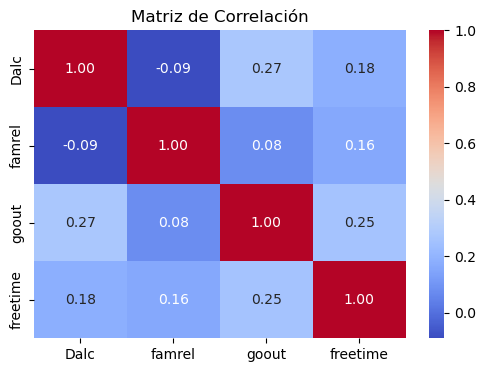

In [190]:
correlacion = data[['Dalc','famrel','goout','freetime']].corr()
plt.figure(figsize=(6, 4))
sb.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Resultado primera gráfica de calor
Gracias a este análisis pude darme cuenta que efectivamente existe una correlación entre los datos, claramente existen unos con mayor relación que otros, por ejemplo, según el mapa de calor, una de las mayores causas para que una persona tome alcohol diariamente, por lo general es el salir con amigos, y tiene sentido en el aspecto de que son jóvenes y generalmente este tipo de interacciones con bebidas alcohólicas es común, claro aunque la edad es un poco de muy jóvenes, suele llegar a ocurrir.

Pero, a pesar de esta matriz de correlación/mapa de calor, tambien quise realizar un análisis de regresión para poder visualizar si tambien cumple con alguna línea de tendencia y alguna relación entre los datos.

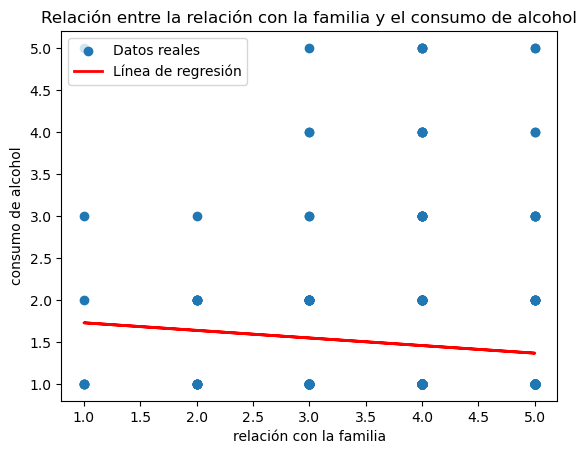

Coeficiente de pendiente (b1): -0.090403895731882
Intercepto (b0): 1.8181609853910055


In [191]:

X = data[['famrel']]
y = data['Dalc']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X, y)

# Realizar predicciones
y_pred = model.predict(X)

# Graficar los datos y la línea de regresión
plt.scatter(X, y, label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('relación con la familia')
plt.ylabel('consumo de alcohol')
plt.legend()
plt.title('Relación entre la relación con la familia y el consumo de alcohol')
plt.show()

# Imprimir los coeficientes del modelo
print('Coeficiente de pendiente (b1):', model.coef_[0])
print('Intercepto (b0):', model.intercept_)

# Resultado 1° gráfica de regresión lineal
Al ver la grafica de relación entre la relación con la familia y el consumo de alcohol podemos ver que si existe una significancia, existe una relación entre los datos ya que como podemos observar, mientras mejor se tenga una relación con la familia (siendo esto representado por un 5) menos alcohol se va a consumir.

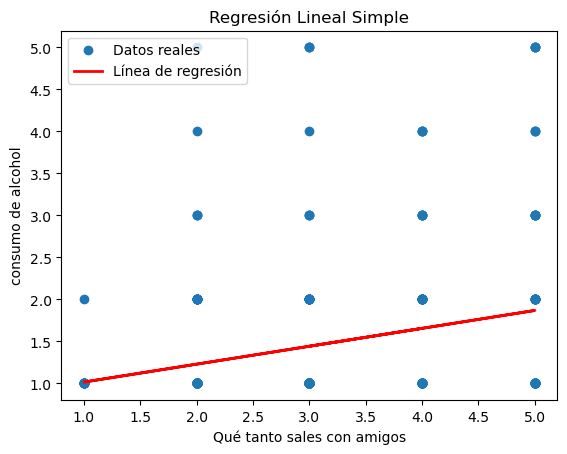

Coeficiente de pendiente (b1): 0.21311840150433142
Intercepto (b0): 0.8032168002813445


In [120]:
X = data[['goout']]
y = data['Dalc']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X, y)

# Realizar predicciones
y_pred = model.predict(X)

# Graficar los datos y la línea de regresión
plt.scatter(X, y, label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Qué tanto sales con amigos')
plt.ylabel('consumo de alcohol')
plt.legend()
plt.title('Regresión Lineal Simple')
plt.show()

# Imprimir los coeficientes del modelo
print('Coeficiente de pendiente (b1):', model.coef_[0])
print('Intercepto (b0):', model.intercept_)

# Resultado 2° gráfica de regresión lineal
Al ver la grafica de relación entre la relación con que tanto sales con amigos y el consumo de alcohol podemos ver que si existe una significancia, existe una relación entre los datos ya que como podemos observar, mientras mas salgas con amigos(siendo esto representado por un 5) más alcohol se va a consumir y viceversa.

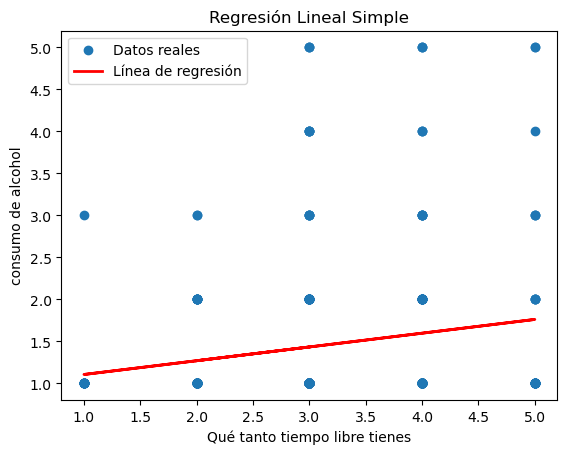

Coeficiente de pendiente (b1): 0.16385924684716469
Intercepto (b0): 0.9425581326983566


In [124]:
X = data[['freetime']]
y = data['Dalc']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X, y)

# Realizar predicciones
y_pred = model.predict(X)

# Graficar los datos y la línea de regresión
plt.scatter(X, y, label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Qué tanto tiempo libre tienes')
plt.ylabel('consumo de alcohol')
plt.legend()
plt.title('Regresión Lineal Simple')
plt.show()

# Imprimir los coeficientes del modelo
print('Coeficiente de pendiente (b1):', model.coef_[0])
print('Intercepto (b0):', model.intercept_)

# Resultado 3° gráfica de regresión lineal
Al ver la grafica de relación entre la relación con que tanto sales con amigos y el consumo de alcohol podemos ver que si existe una significancia, existe una relación entre los datos ya que como podemos observar, mientras mas tiempo libre tenga uno(siendo esto representado por un 5) más alcohol se va a consumir y viceversa.

# Realización de primer modelo de predicción

In [142]:
x=data[['famrel','goout','freetime']]
y= data['Dalc']
x2=sm.add_constant(x)

In [148]:
modelo=sm.OLS(y,x2)
#modelo=modelo.fit()

resultado=modelo.fit()
resultado.summary()
#Aquí si el p valor es menor a 0.05 es predecible y para poder hacer una predicción tenemos que utilizar los coeficientes
#3.8698+(-0.3360*Socializing)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Dalc   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     12.33
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           1.18e-07
Time:                        22:23:03   Log-Likelihood:                -409.18
No. Observations:                 324   AIC:                             826.4
Df Residuals:                     320   BIC:                             841.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9782      0.259      3.774      0.000       0.468       1.488
famrel        -0.1307      0.053     -2.459      0.014      -0.235      -0.026
goout          0.1938      0.043      4.512      0.000       0.109       0.278
freetime       0.1254      0.051      2.475      0.014       0.026       0.225
==============================================================================
Omnibus:                      148.778   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              533.230
Skew:                           2.080   Prob(JB):                    1.62e-116
Kurtosis:                       7.711   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos ver que el modelo nos quedó con la formula siguiente de los coeficientes (1 siendo pésimo, 5 siendo excelente): 

consumo de alcohol=0.9782+(-0.1307*relación con la familia )+(0.1938*frecuencia de salir con amigos)+(0.1254*tiempo libre)

In [193]:
0.9782+(-0.1307*1)+(0.1938*5)+(0.1254*5)
#Aqui utilizamos variables de que no se lleva bien con la familia, sale mucho con amigos y tiene mucho tiempo libre
#y podemos ver que el consumo de alcohol es considerablemente alto

2.4435000000000002

In [195]:
0.9782+(-0.1307*5)+(0.1938*3)+(0.1254*2)
#Aquí podemos ver de igual manera como la relación con la familia afecta demasiado, aquí coloqué que si el alumno sigue 
#saliendo con sus amigos de manera regular, tiene un poco de tiempo libre, pero tiene una excelente relación con su familia
#el resultado es que el consumo del acohol disminuira bastante.

1.1568999999999998

Podemos ver que el modelo es acertivo ya que en primer lugar tenemos un valor de p menor a 0.05 por lo que nos dice que si es predecible, no es exácto ni el óptimo ya que tiene un r cuadrado de apenas el 10.4%, pero sirve para poder predecir algo. Y en esta ocasión se logró el cometido. 

Ahora bien, después de hacer la visualización de ¿Por qué los alumnos llegan a consumir mucho alcohol, ahora si queremos ver las consecuencias de esta acción?

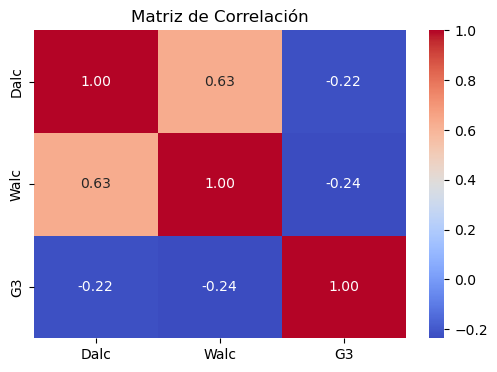

In [160]:
correlacion_2 = data[['Dalc','Walc','G3']].corr()
plt.figure(figsize=(6, 4))
sb.heatmap(correlacion_2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Resultado segunda gráfica de calor
Ahora bien, quise realizar un análisi de correlación para ver que variable significativa será la mas crítica para predecir la calificación, quiero ver si consumir díario alcohol afecta mas a la calificación o afecta mas consumir frecuentemente cada fin de semana.
 
Y al visualizarlo podemos ver que existe un poco mas de relación el consumir todos los días alcohol, 'Dalc', con las calificaciones que la variable de consumo de alcohol cada fin de semana 'Walc'.

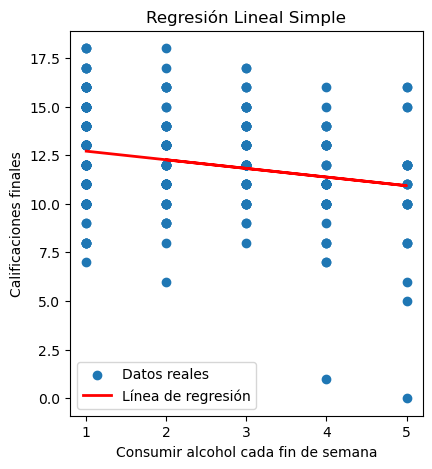

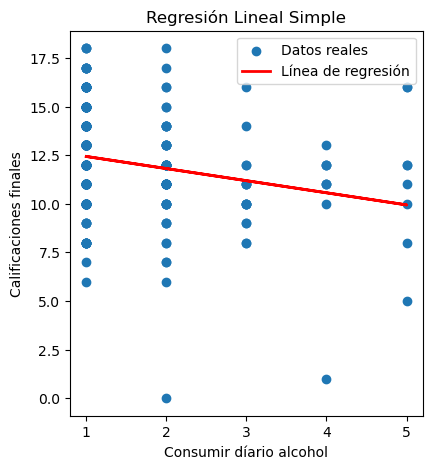

In [196]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
X = data[['Walc']]
y = data['G3']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X, y)

# Realizar predicciones
y_pred = model.predict(X)

# Graficar los datos y la línea de regresión

plt.scatter(X, y, label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Consumir alcohol cada fin de semana')
plt.ylabel('Calificaciones finales')
plt.legend()
plt.title('Regresión Lineal Simple')




plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
X = data[['Dalc']]
y = data['G3']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X, y)

# Realizar predicciones
y_pred = model.predict(X)

# Graficar los datos y la línea de regresión
plt.scatter(X, y, label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Consumir díario alcohol')
plt.ylabel('Calificaciones finales')
plt.legend()
plt.title('Regresión Lineal Simple')


# Imprimir los coeficientes del modelo
#print('Coeficiente de pendiente (b1):', model.coef_[0])
#print('Intercepto (b0):', model.intercept_)

# Imprimir los coeficientes del modelo
#print('Coeficiente de pendiente (b1):', model.coef_[0])
#print('Intercepto (b0):', model.intercept_)
plt.show()

# Resultados 4° y 5° gráfica de regresión lineal
Aquí solamente quise cerciorarme un poco mas que variable tiene una mejor visualización y por un muy mínimo desplazamiento llegué a la conclusión de que el consumo díario de alcohol 'Dalc' tiene un mayor peso en el resultado de las calificaciones de los estudiantes

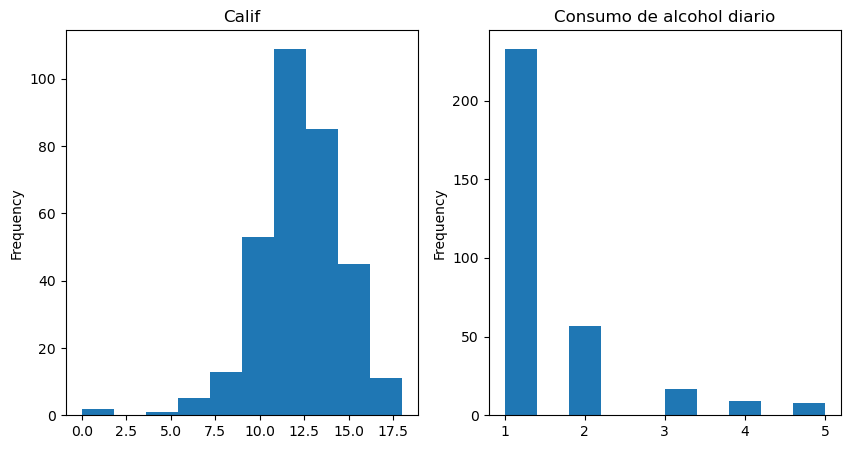

In [203]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
data['G3'].plot(kind='hist')
plt.title("Calif")

plt.subplot(1,2,2)
data['Dalc'].plot(kind='hist')
plt.title("Consumo de alcohol diario")

plt.show()

# Resultados 1° y 2° histograma
Lo que quise visualizar en este histograma era si los datos cumplian con una distribución normal y podemos ver que no es así, en el caso de las califiaciones, está sesgada hacia la derecha, y vemos que tiene algunos valores atípicos, los cuales no podemos descartar porque como son calificaciones, es normal que existan calificaciones de 0, por otro lado, tambien podemo visualizar que los datos de consumo de alcohol díario no cumple para nada una distribución normal, pero nos da como resultado que en la encuesta, muchos estudiantes no consumen diariamente alcohol, lo que es algo bueno.

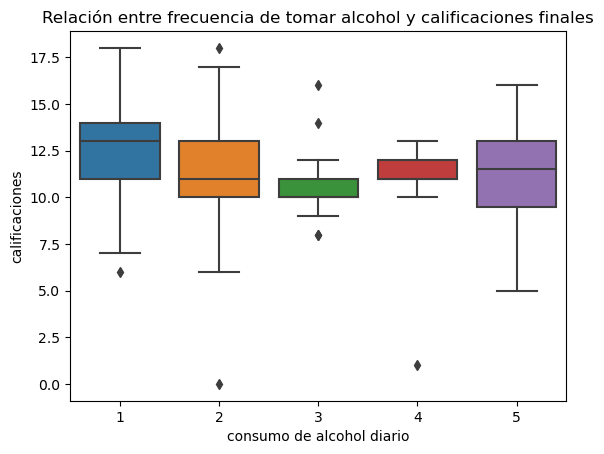

In [177]:
sb.boxplot(x=data['Dalc'],y=data['G3'])
plt.title('Relación entre frecuencia de tomar alcohol y calificaciones finales')
plt.xlabel('consumo de alcohol diario')
plt.ylabel('calificaciones')
#plt.xticks([0,1],['Masculino','Femenino'])
plt.show()

# Resultados 1° boxplot diagrama de caja y bigotes
Podemos análisar en este diagrama de caja y bigotes el comportamiento del consumo de alcohol díario y como afecta a las califiaciones, pero tambien podemos ve que existen valores atípicos, de los cuales mencionan que por ejemplo, no todas los estudiantes que no tomen alcohol diariamente significa que sus notas serán excelentes, por otro lado, puede que exista estudiantes que a pesar de que tomen diario alcohol, puede que tengan buenas notas.

<Axes: xlabel='G3'>

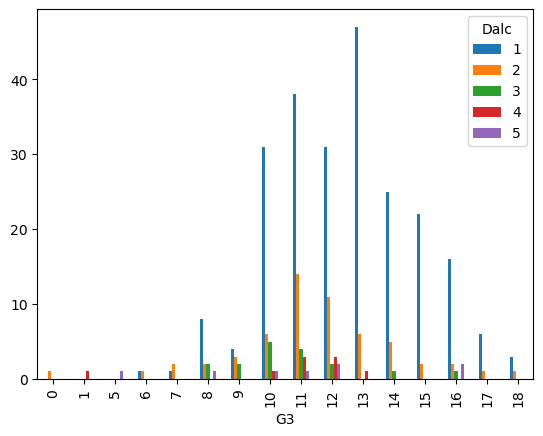

In [199]:
pd.crosstab(index=data['G3'],columns=data['Dalc']).plot(kind='bar')

# Resultados 3° Histograma y crosstab
En este gráfico podemos análizar nuevamente como si llega afectar que mientras menos alcohol consumas mejores calificaciones vas a tener, y tambien podemos concluir que nunca van a tener una excelente calificación las personas que consuman díario alcohol.

# Realización del segundo modelo de predicción

In [181]:
x=data['Dalc']
y= data['G3']
x4=sm.add_constant(x)

In [182]:
modelo=sm.OLS(y,x4)
#modelo=modelo.fit()

resultado=modelo.fit()
resultado.summary()
#Aquí si el p valor es menor a 0.05 es predecible y para poder hacer una predicción tenemos que utilizar los coeficientes
#3.8698+(-0.3360*Socializing)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     17.16
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           4.40e-05
Time:                        22:41:32   Log-Likelihood:                -748.46
No. Observations:                 324   AIC:                             1501.
Df Residuals:                     322   BIC:                             1508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0562      0.259     50.502      0.000      12.548      13.565
Dalc          -0.6228      0.150     -4.142      0.000      -0.919      -0.327
==============================================================================
Omnibus:                       23.015   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.912
Skew:                          -0.355   Prob(JB):                     1.45e-11
Kurtosis:                       4.787   Cond. No.                         4.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos observar que este tambien es un modelo que puede predecir ya que tenemos un valor de p menor al alfa de 0.05, y aunque nuestro R cuadrado sea de apenas 5%, podemos hacer una predicción, que en este caso, si es factible y tiene lógica el resultado:

la fórmula fue la siguiente: 

calificación=13.0562+(-0.6228*frecuencia de consumo de alcohol díario) (siendo 1 poco y 5 mucho)

In [201]:
13.0562+(-0.6228*1)
#Podemos ver que el modelo predice un buen resultado, teniendo una calificación no muy baja, de apenas 12.4334

12.4334

In [202]:
13.0562+(-0.6228*5)
#Y nuevamente podemos ver como el modelo funciona ya que si existe una frecuencia alta de consumo de alcohol, 
#las calificaciones bajan.

9.9422

# Elección y justificación del modelo seleccionado, Conclusiones., Limitaciones y trabajo futuro.

Elegí estos modelos ya que para mí fueron los mas precisos que pude realizar, el modelo cumplio con su objetivo el cual era demostrar una predicción significativa y con lógica, por lo tanto puedo concluir que el modelo y la actividad sirven para darle un seguimento a la situación problema, logramos demostrar la hipótesis nula que teníamos al principio el cual era saber si el consumo de alcohol afecta a las calificaciones de los estudiantes, podemos concluir con nuestro modelo que efectivamente, si afecta el consumir alcohol con las calificiones.

Puedo argumentar que una de las limitaciones que tuve fue el no saber utilizar bien algunos códigos para poder limpiar y lograr una mejor visualización en mis datos, por lo que el trabajo futuro será el aprender mejores códigos para mostrar un resultado mas pulcro y visualmente atractivo, pero estoy feliz con el resultado obtenido.